# Section 2.7 — Simulation and empirical distributions

This notebook contains the code examples from **Section 2.7 Simulation and empirical distributions**
of the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (6, 3)})
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

In [3]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

In [4]:
%pip install -q ministats

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ministats import plot_cdf
from ministats import plot_pdf

## Why simulate?

Running simulations of random variables is super useful:

- **Simplified probability calculations**:
  no need for complicated integrals,
  since we can replace any calculation you might want to do with the distribution $f_X$
  with an equivalent calculation on the list of observations $[x_1,x_2,\ldots,x_N]$
- **Visualize probability theory results**:
  using simulations based on random observations $[x_1, x_2, x_3, \ldots, x_N]$,
  we can visualize these theoretical results
  to gain hands-on intuition and experience with them.
- **Verify that statistics procedures work**:
  we can use simulation to experimentally verify the performance of the statistical procedure.
  Does a procedure really work correctly 95\% of the time?
  Simulate 1000 datasets and count the proportion of times when the procedure worked correctly.


In the remainder of this section,
we'll learn how to use the list of observations $[x_1,x_2,\ldots,x_N]$
as an alternative to the math calculations with the random variable $X$,
including visualizations and various probabilities.

## Observations from random variables

### Generating lists of random observations

In [6]:
from scipy.stats import expon

lam = 0.2
rvE = expon(loc=0, scale=1/lam)

In [7]:
np.random.seed(44)

N = 1000  # number of observations to generate
es = rvE.rvs(N)
es[0:7].round(3)

array([9.004, 0.554, 6.825, 2.235, 2.226, 4.698, 2.503])

### Visualizing probability distribution

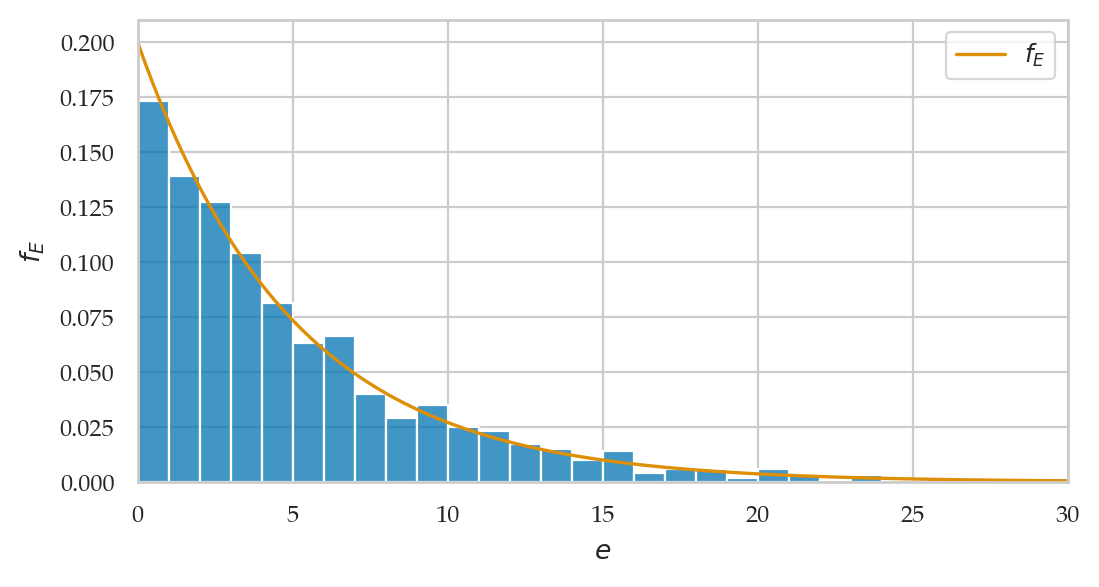

In [8]:
ax = sns.histplot(es, bins=range(0,31), stat="density");
plot_pdf(rvE, rv_name="E", ax=ax, color="C1", label="$f_E$")
ax.set_xlim([0,30]);

### Calculate the mean and variance

In [9]:
import numpy as np
np.mean(es), rvE.mean()

(5.119377169180479, 5.0)

In [10]:
np.var(es), rvE.var()

(25.12355642871208, 25.0)

In [11]:
np.std(es), rvE.std()

(5.012340414288726, 5.0)

### Calculate probabilities

In [12]:
len([e for e in es if e >= 7]) / len(es)

0.247

In [13]:
from scipy.integrate import quad
quad(rvE.pdf, 7, np.inf)[0]

0.2465969639416065

In [14]:
1 - rvE.cdf(7)

0.24659696394160646

### Compute expectations

In [15]:
def fatigue(e):
    return 10 / (1 + e)

np.mean([fatigue(e) for e in es])

2.894485288770725

In [16]:
rvE.expect(fatigue)

2.9866974938644915

## Empirical distributions

### Empirical probability mass function

In [17]:
xs = [1, 1.5, 2, 3, 3, 3.5, 6, 7, 10, 17]

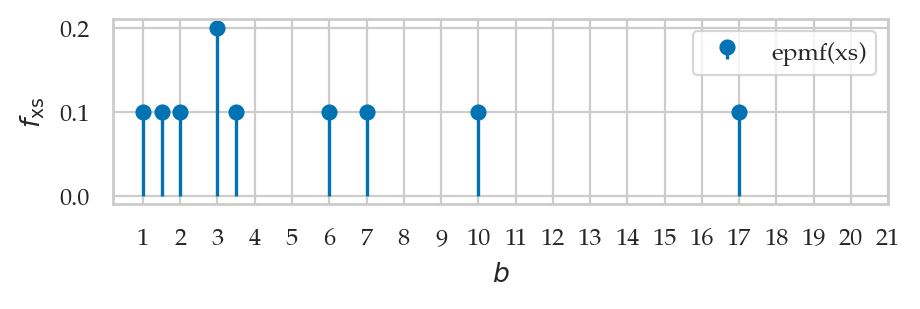

In [18]:
from ministats import plot_epmf

plot_epmf(xs, name="xs");

### Generating bootstrap observations

Suppose we want to simulate new random observations form $f_E$,
but for some reason we don't have access to the method `rvE.rvs` anymore.

In [19]:
np.random.seed(52)

xs_boot = np.random.choice(xs, 5, replace=True)
xs_boot

array([3.5, 7. , 6. , 7. , 1. ])

In [20]:
[x_boot in xs for x_boot in xs_boot]

[True, True, True, True, True]

In [21]:
list(xs_boot).count(7)

2

### Empirical cumulative distribution function

Let's write a function that compute the value empirical cumulative distribution (empirical CDF) 
of the sample `data`. The function takes two inputs: `data` the sample of observations,
and `b`, the value where we want to evaluate the function.

In [22]:
def ecdf(data, b):
    sorted_data = np.sort(data)
    count = sum(sorted_data <= b)  # num. of obs. <= b
    return count / len(data)       # proportion of total

Note the sorting step is not strictly necessary,
but it guarantees the `sdata` is a NymPy `array` object which allows the comparison to work.

In [23]:
ecdf(xs, 5)

0.6

In [24]:
ecdf(xs, 10)

0.9

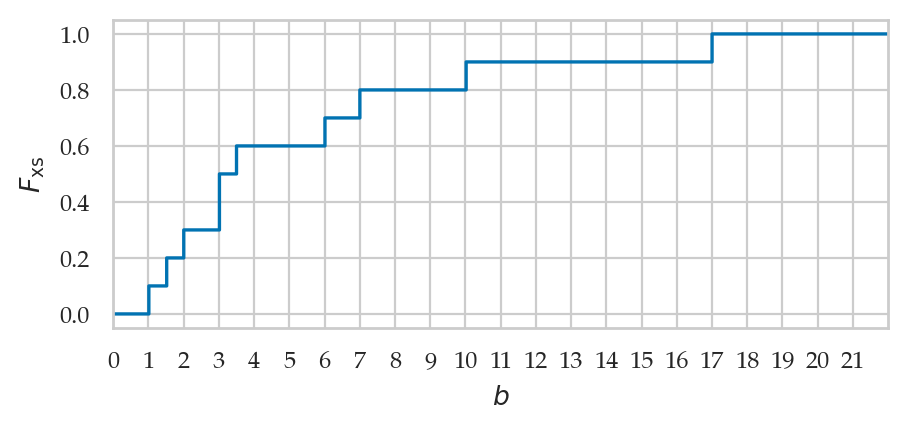

In [25]:
from ministats import plot_ecdf

ax = plot_ecdf(xs, name="xs")

In [26]:
# # ALT. use Seaborn helper function
# import seaborn as sns
# sns.ecdfplot(xs);

### Inverse of the empirical cumulative distribution function

In [27]:
def inv_ecdf(data, q):
    return np.quantile(data, q, method="inverted_cdf")

# TEST inv_ecdf
# K = 1000
# qs = np.linspace(0, 1, K)
# qs2 = np.ndarray(K)
# for i, q in enumerate(qs):
#     x = inv_ecdf(es, q)
#     q2 = ecdf(es, x)
#     qs2[i] = q2
# sns.histplot(qs2 - qs)

## Random variable generation from scratch

### Uniform random variable primitive

In [28]:
import numpy as np
np.random.seed(41)
np.random.rand()

0.25092362374494015

In [29]:
np.random.seed(42)
np.random.rand()

0.3745401188473625

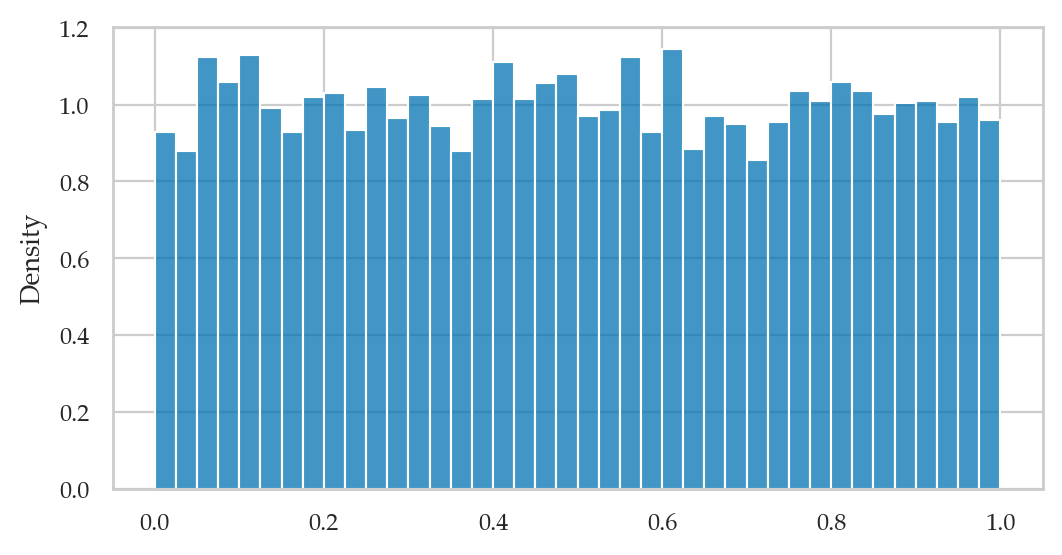

In [30]:
np.random.seed(45)

us = np.random.rand(8000)
sns.histplot(us, bins=40, stat="density");

### Continuous random variable generation

See the book or explanations of the the invers-CDF trick.


### Generating exponentially distributed observations

In [31]:
def gen_e(lam):
    u = np.random.rand()
    e = -1 * np.log(1-u) / lam
    return e

Where `lam` is the $\lambda$ (lambda) parameter chosen for exponential model family.

In [32]:
np.random.seed(26) 

N = 200  # number of observations to generate
es2 = [gen_e(lam=0.2) for i in range(N)]

In [33]:
es2[0:5]  # first five observations

[1.8403766434262139,
 3.663511132756237,
 7.311508774831116,
 7.784719180427214,
 10.222768798178041]

In [34]:
# [e.round(3) for e in es2[0:5]]  # first five observations

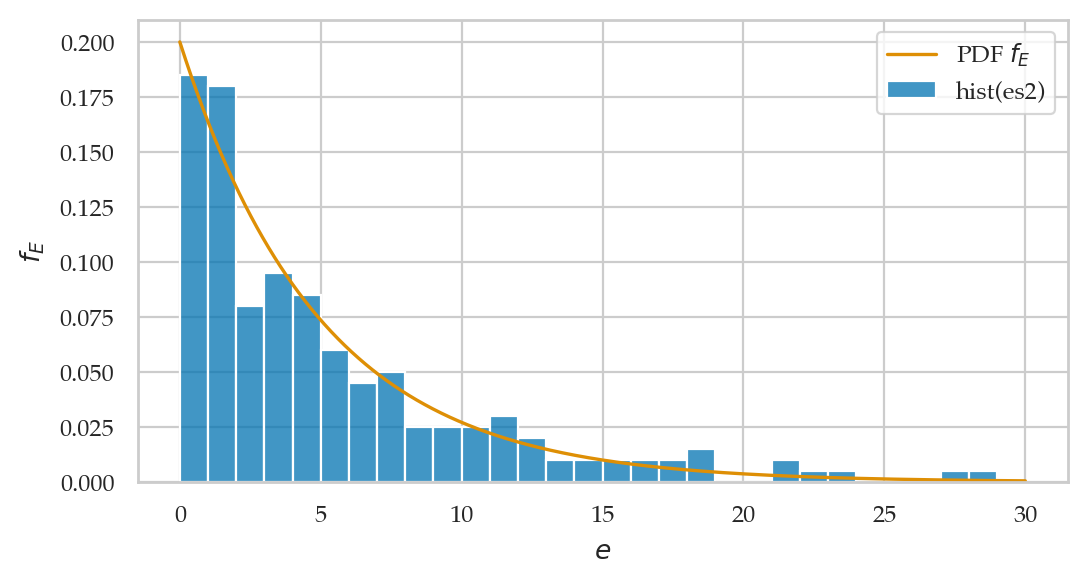

In [35]:
# plot a histogram of data in `es2`
ax = sns.histplot(es2, bins=range(30), stat="density", label="hist(es2)")

# plot the PDF of rvE
plot_pdf(rvE, rv_name="E", xlims=[0,30], color="C1", ax=ax, label="PDF $f_E$");

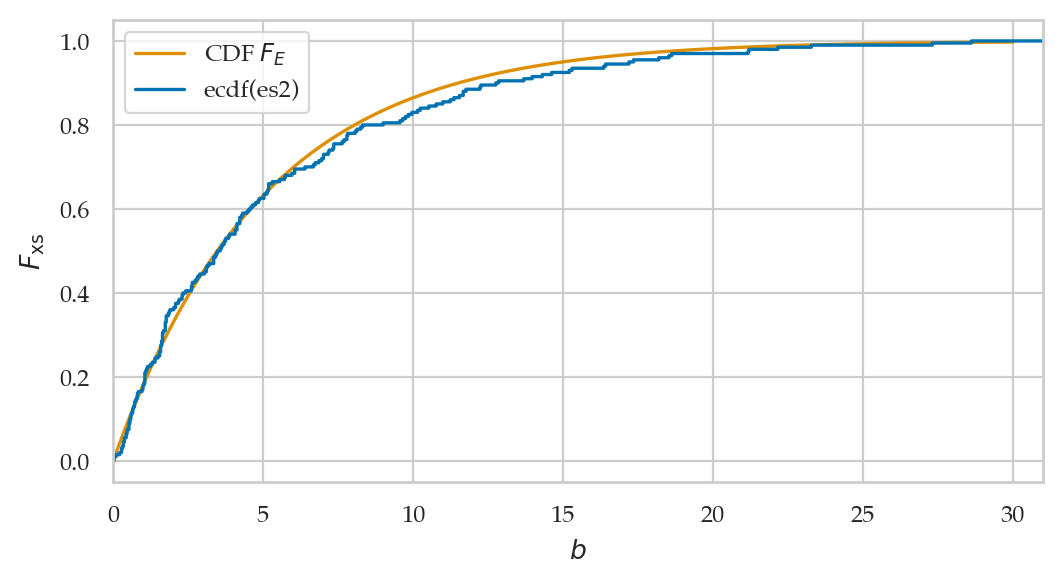

In [36]:
# plot a empirical cumulative distribution and the CDF of rvE
from ministats import plot_ecdf

ax = plot_cdf(rvE, rv_name="E", xlims=[0, 30], color="C1", label="CDF $F_E$")
plot_ecdf(es2, xlims=[0,31], ax=ax, label="ecdf(es2)")
ax.set_xticks(range(0,31,5));

We'll develop various way to analyze this "goodness of fit" between the sample `es` data we generated
and the theoretical model $f_E$ in the remainder of this notebook.

### Measuring data-model fit

Want to measure if `es` comes from $\textrm{Expon}(\lambda=0.2)$.
Here are the first five values we simulated:

In [37]:
es2[0:5]

[1.8403766434262139,
 3.663511132756237,
 7.311508774831116,
 7.784719180427214,
 10.222768798178041]

#### Visual comparison between data and model distributions



In [38]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0, 1/lam)

Here is the code for visual comparison of `es2` and the theoretical model `rvE` $=\mathrm{Expon}(\lambda=0.2)$, based on the probability density and cumulative probability distributions.

#### Using Q-Q plots to compare quantiles

The quantile-quantile plot `qq_plot(data, dist)`
is used to compare the positions of the quantiles of the dataset `data`
against the quantiles of the theoretical distribution `dist`,
which is an instance of one of the probability models in `scipy.stats`.

##### Exponential sample vs. true exponential model

Text(0, 0.5, 'Location of the es2 quantiles')

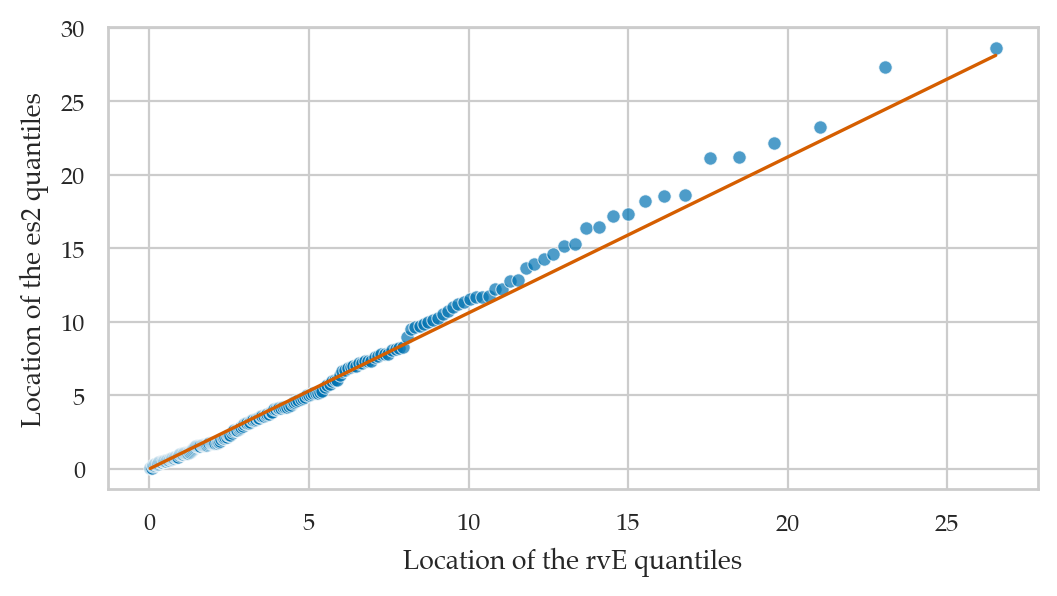

In [39]:
from ministats import qq_plot

ax = qq_plot(es2, dist=rvE)
ax.set_xlabel("Location of the rvE quantiles")
ax.set_ylabel("Location of the es2 quantiles")

Another way to generate a Q-Q plot is to use
the function `qqplot` defined in the the `statsmodels` package.

In [40]:
# # ALT. using `qqplot` from `statsmodels`
# from statsmodels.graphics.api import qqplot
# qqplot(np.array(es2), dist=rvE, line="45");

##### Exponential data vs. standard normal

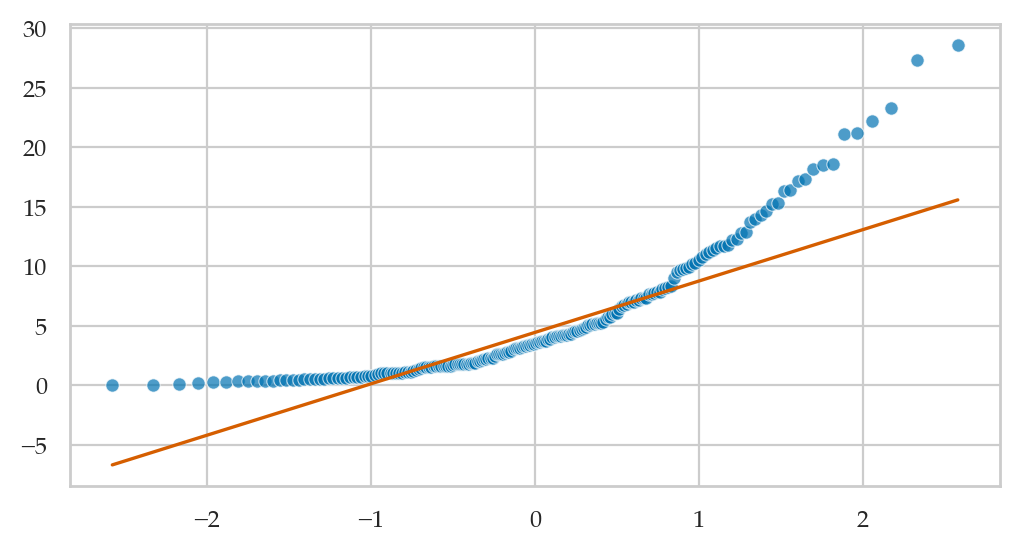

In [41]:
from scipy.stats import norm
qq_plot(es2, dist=norm(0,1));

Note the lowest quantiles don't match (exponential data limited to zero),
and the high quantiles don't match either (exponential data has a long tail).

##### Normal data vs. standard normal

Here is an example of a Q-Q plot with very good fit.

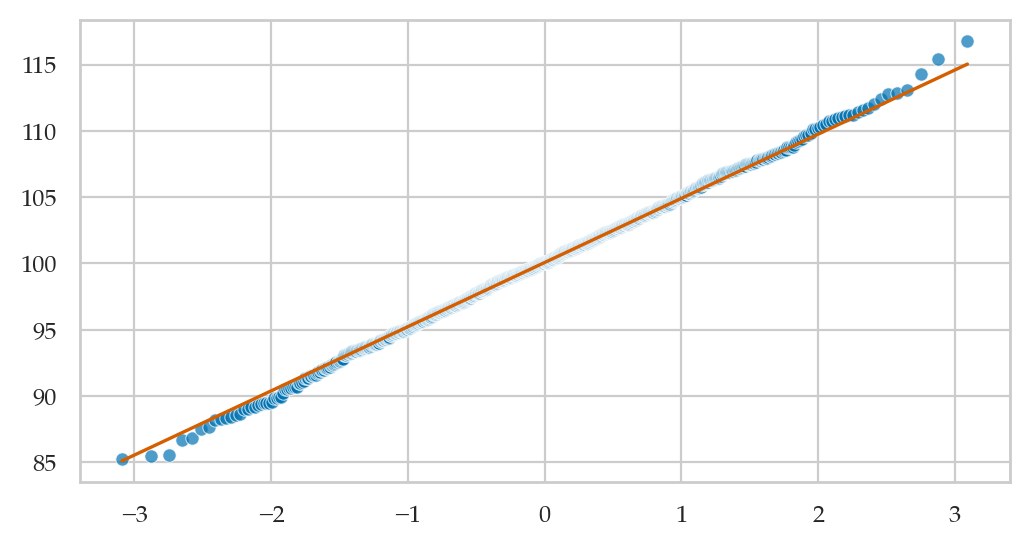

In [42]:
rvN = norm(100, 5)
ns = rvN.rvs(1000)
qq_plot(ns, dist=norm(0,1));

##### Student's t-data vs. standard normal

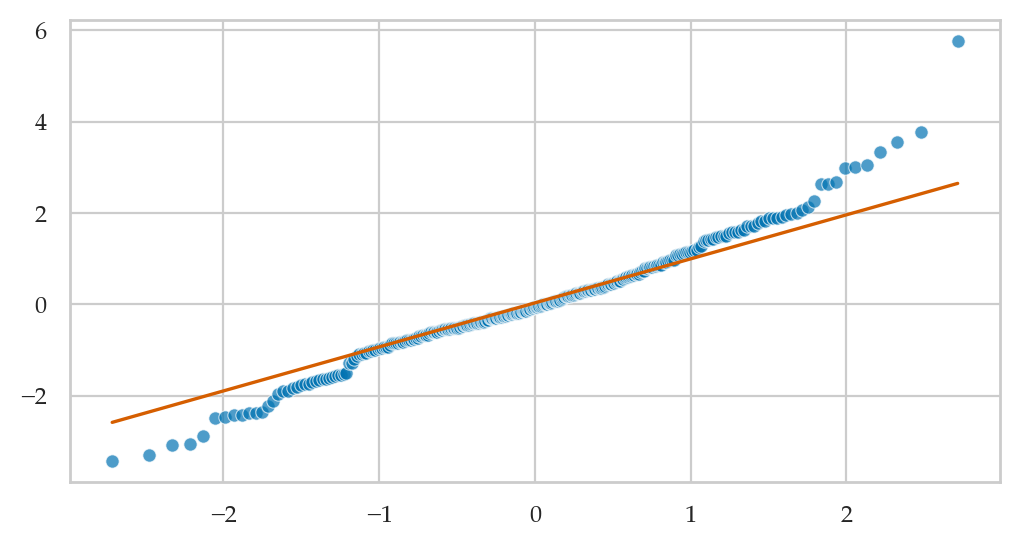

In [43]:
from scipy.stats import t as tdist
np.random.seed(46)
rvT = tdist(df=5)
ts = rvT.rvs(300)
qq_plot(ts, dist=norm(0,1));

##### Bimodal data vs. standard normal (BONUS EXAMPLE)

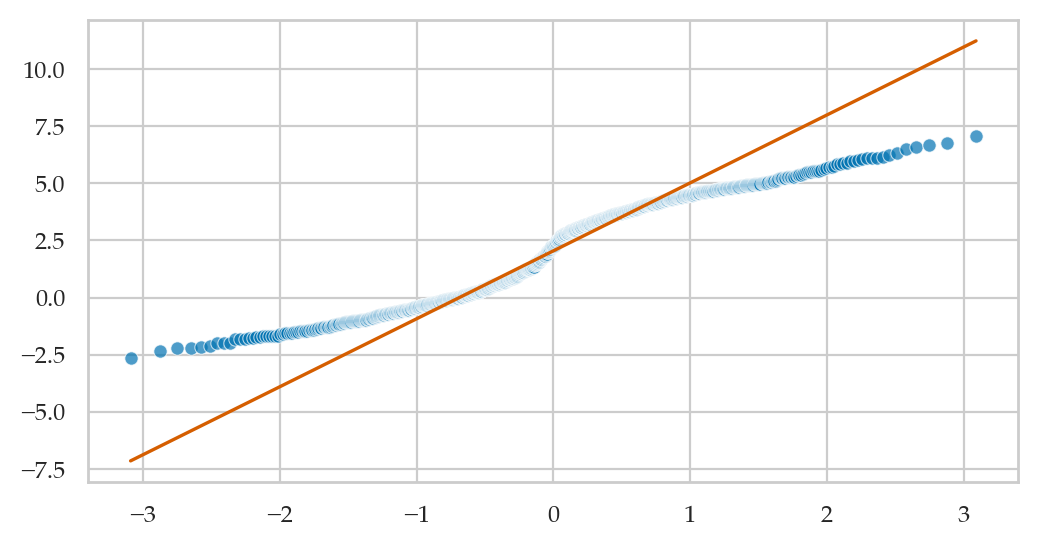

In [44]:
from ministats.probs import MixtureModel

np.random.seed(47)
rvBN = MixtureModel([norm(0,1), norm(4, 1)], weights=[0.5,0.5])
bns = rvBN.rvs(1000)
qq_plot(bns, dist=norm(0,1));

#### Comparing moments

A simple way to measure how well the data sample $\mathbf{x} = (x_1, x_2, \ldots , x_n)$
fits the probability model $f_X$ is to check if the data distribution
and the probability distribution have the same moments.

In order to easily be able to calculate the moments of the data samples,
we'll convert `es` into a Pandas series object,
which has all the necessary methods.

In [45]:
es2_series = pd.Series(es2)

In [46]:
es2_series.mean(), rvE.mean()

(5.3330881197327535, 5.0)

In [47]:
es2_series.var(), rvE.var()

(30.45191637582025, 25.0)

Let's now compare the [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) of dataset and the [skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution:

In [48]:
es2_series.skew(), rvE.stats("s")

(1.711852367068079, 2.0)

Finally,
let's compare the [kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html) of dataset and the [kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution.

In [49]:
es2_series.kurt(), rvE.stats("k")

(3.0431185936008607, 6.0)

#### Kolmogorov–Smirnov distance

In [50]:
from scipy.stats import ks_1samp

Let's jump right ahead and compute the KS distance for the data and distribution of interest.

In [51]:
ks_1samp(es2, rvE.cdf).statistic

0.048609282602185055

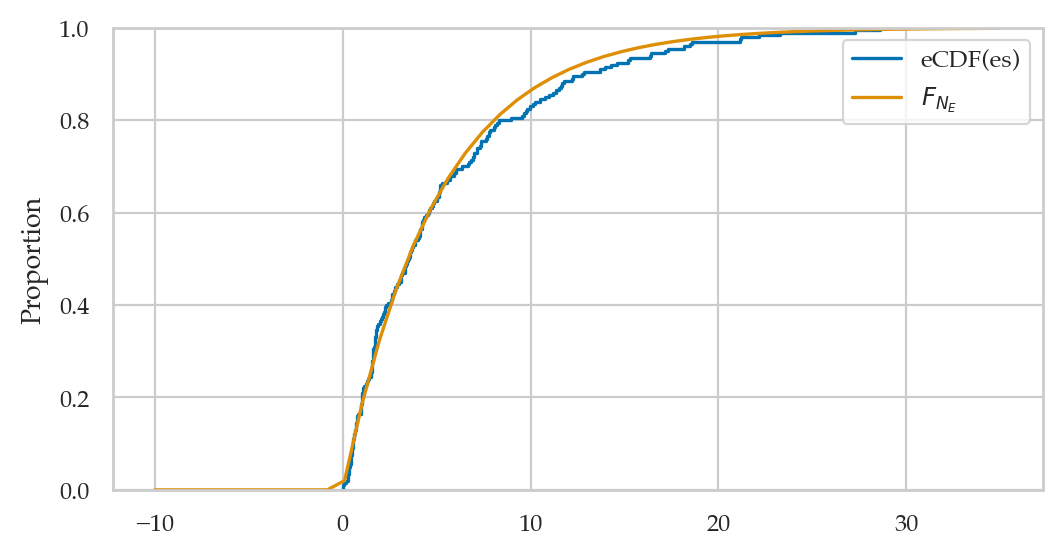

In [52]:
sns.ecdfplot(es2, label="eCDF(es)")
bs = np.linspace(-10,35)
sns.lineplot(x=bs, y=rvE.cdf(bs), label="$F_{N_E}$");

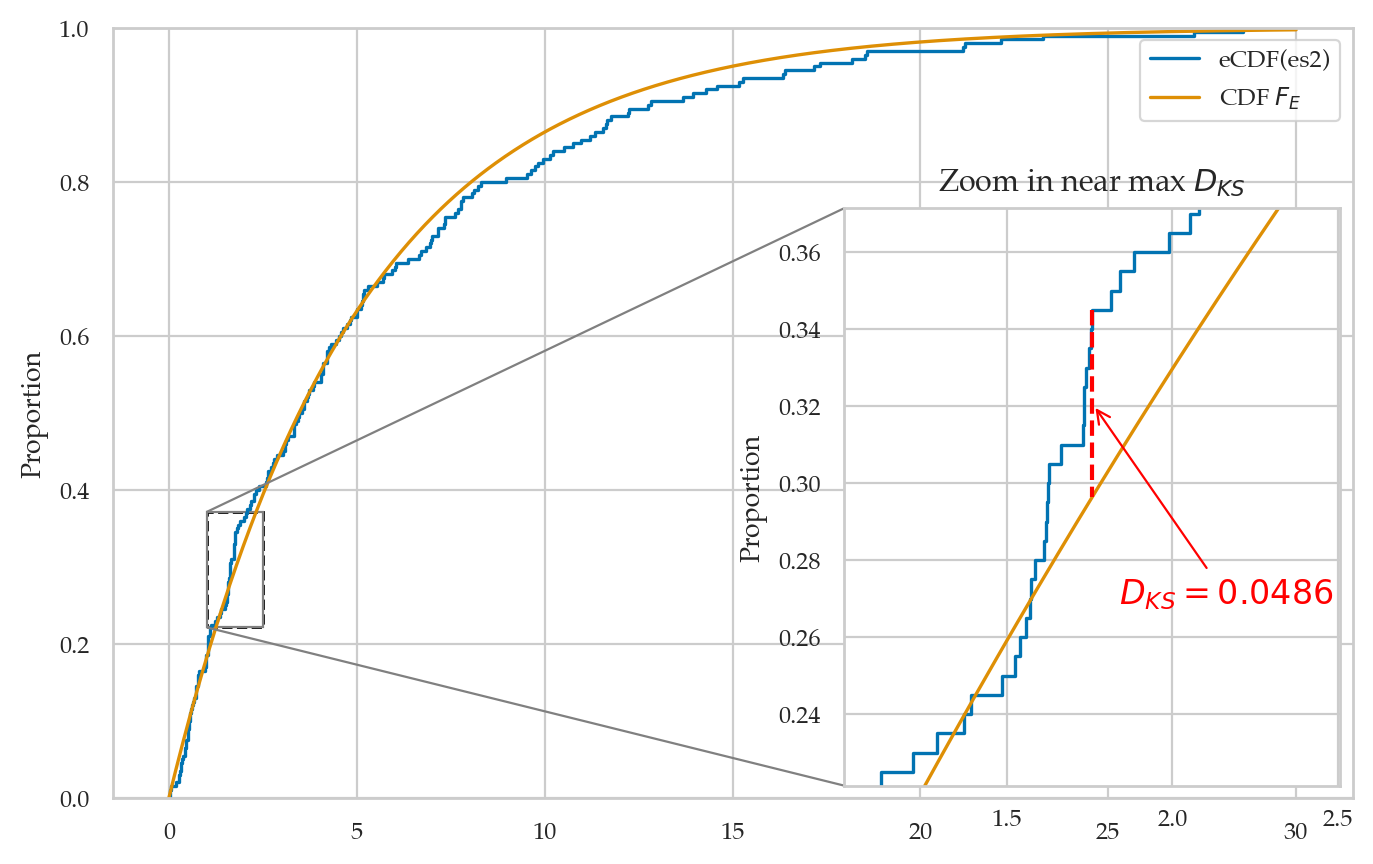

In [53]:
from ministats.book.figures import plot_ks_dist_with_inset

plot_ks_dist_with_inset(es2, rvE, label_sample="eCDF(es2)", label_rv="CDF $F_E$");

## Discussion

### Seeding random number generators

Every time you run the following two cells, you'll get different numbers.

In [54]:
from scipy.stats import norm
rvZ = norm(0,1)
rvZ.rvs(3)

array([-1.29926108,  1.10740701,  1.66512925])

In [55]:
rvZ.rvs(3)

array([ 0.82613809, -0.93630083, -1.2185572 ])

We can set random seed for repeatability.

In [56]:
import numpy as np
np.random.seed(46)
rvZ.rvs(3)

array([0.58487584, 1.23119574, 0.82190026])

In [57]:
np.random.seed(46)
rvZ.rvs(3)

array([0.58487584, 1.23119574, 0.82190026])